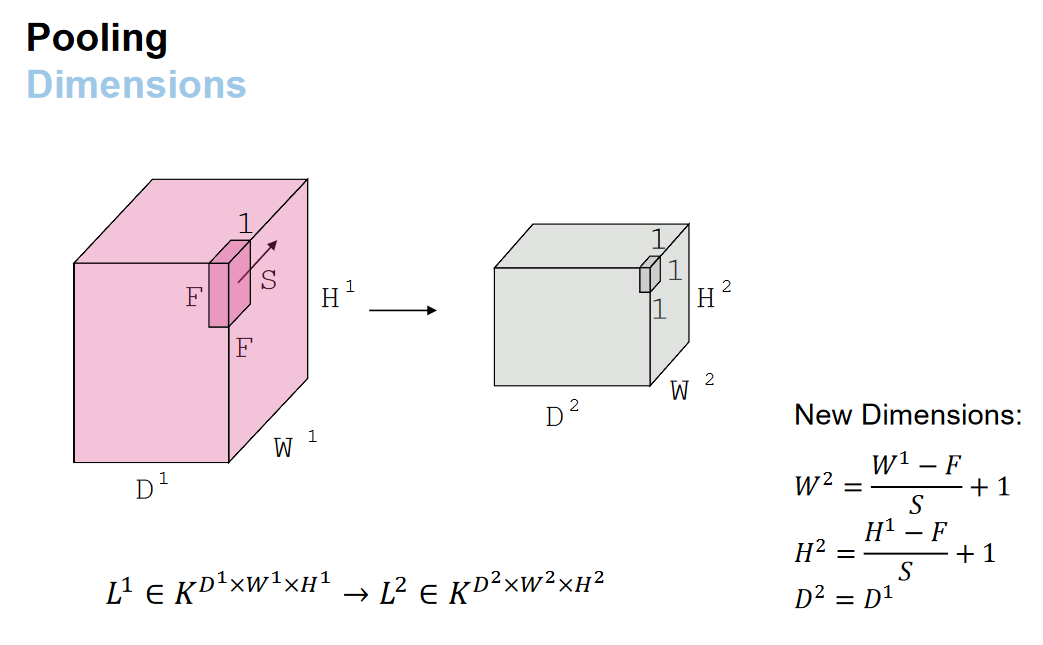

In [7]:
import torch
from torch import nn
from torch.nn import MaxPool2d

input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]], dtype=torch.float32)

input = torch.reshape(input, (-1, 1, 5, 5))
print(input.shape)

class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.maxpool1 = MaxPool2d(kernel_size=3, ceil_mode=True)

    def forward(self, input):
        output = self.maxpool1(input)
        return output
    
myModule = MyModule()
output = myModule(input)
output

torch.Size([1, 1, 5, 5])


tensor([[[[2., 3.],
          [5., 1.]]]])

In [8]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        # --- ceil_mode default is False ---
        self.maxpool1 = MaxPool2d(kernel_size=3, ceil_mode=False)

    def forward(self, input):
        output = self.maxpool1(input)
        return output
    
myModule = MyModule()
output = myModule(input)
output

tensor([[[[2.]]]])

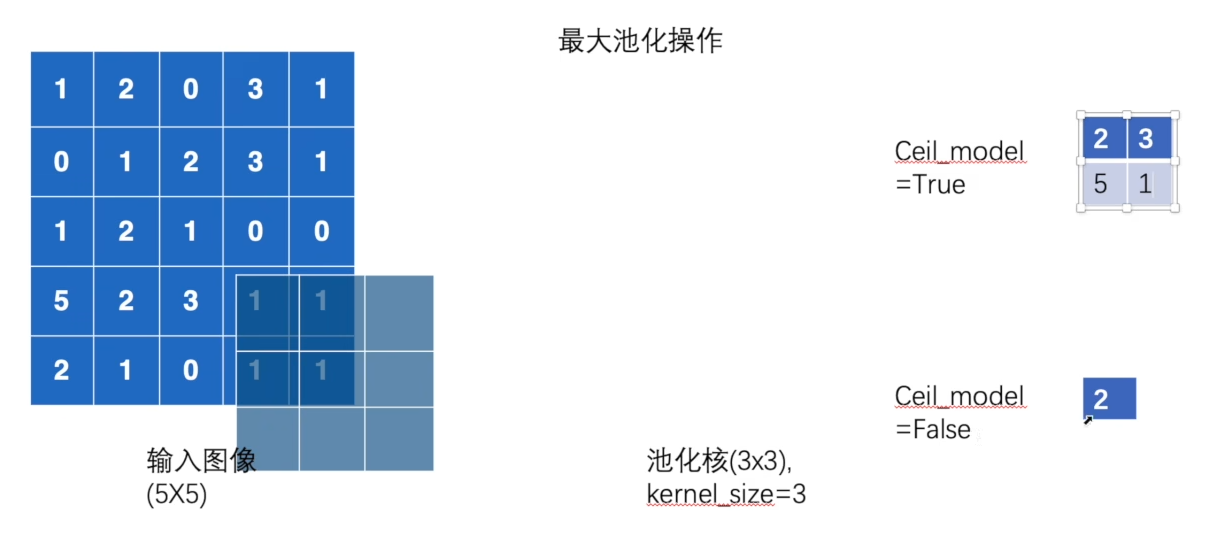

In [12]:
import torch
from torch import nn
from torch.nn import MaxPool2d
import torchvision
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10(root="./dataset", train=True, transform=torchvision.transforms.ToTensor())

dataLoader = DataLoader(dataset=dataset, batch_size=64)

class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.maxpool1 = MaxPool2d(kernel_size=3, ceil_mode=False)

    def forward(self, input):
        output = self.maxpool1(input)
        return output
    
writer = SummaryWriter("logs")

step = 0
for data in dataLoader:
    imgs, targets = data
    writer.add_images("input", imgs, step)
    output = myModule(imgs)
    writer.add_images("output", output, step)
    step += 1

writer.close()